In [1]:
import mode_analyze
reload(mode_analyze)
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Setting up models
model=mode_analyze.n3_poly()
ma_3=mode_analyze.ModeAnalyzer(model,'poly_3/poly3.n', n_min=-18, n_max=10, ls=[2,3])

model=mode_analyze.n32_poly()
ma_32=mode_analyze.ModeAnalyzer(model,'poly_32/poly32.n', n_min=0, n_max=10, ls=[2,3])


MM='1'
loc='/home/aleksey/Dropbox/'
base=loc+'mesa_projects/{0}Msun_tau1/'.format(MM)
prof=mode_analyze.prep_mesa(base)

ma_3b=mode_analyze.ModeAnalyzer(prof, '/home/aleksey/Dropbox/gyre_work/1Msun_tau1/{0}Msun.n'.format(MM), -105, 10, [2])



In [3]:
ns=range(-18, 11)
ls=[2, 3]

for ll in ls:
    for nn in ns:
        tag=str(nn)+'_'+str(ll)
        mode=ma_3.modes_dict[tag]
        header='{0:d} {1:d} {2} {3}\nx xi_r xi_h'.format(nn, ll, mode['omega'], mode['Q'])  
        dat=np.transpose([mode['xs'], mode['xi_r'], mode['xi_h']])
        np.savetxt('mode_summary_n3/mode_'+tag, dat,header=header)
            

In [5]:
ns=range(-105, 11)
ls=[2]

for ll in ls:
    for nn in ns:
        tag=str(nn)+'_'+str(ll)
        mode=ma_3b.modes_dict[tag]
        header='{0:d} {1:d} {2} {3}\nx xi_r xi_h'.format(nn, ll, mode['omega'], mode['Q'])  
        dat=np.transpose([mode['xs'], mode['xi_r'], mode['xi_h']])
        np.savetxt('mode_summary_sun/mode_'+tag, dat,header=header)

In [6]:
ns=range(0, 11)
ls=[2, 3]

for ll in ls:
    for nn in ns:
        tag=str(nn)+'_'+str(ll)
        mode=ma_32.modes_dict[tag]
        header='{0:d} {1:d} {2} {3}\nx xi_r xi_h'.format(nn, ll, mode['omega'], mode['Q'])  
        dat=np.transpose([mode['xs'], mode['xi_r'], mode['xi_h']])
        np.savetxt('mode_summary_n32/mode_'+tag, dat,header=header)

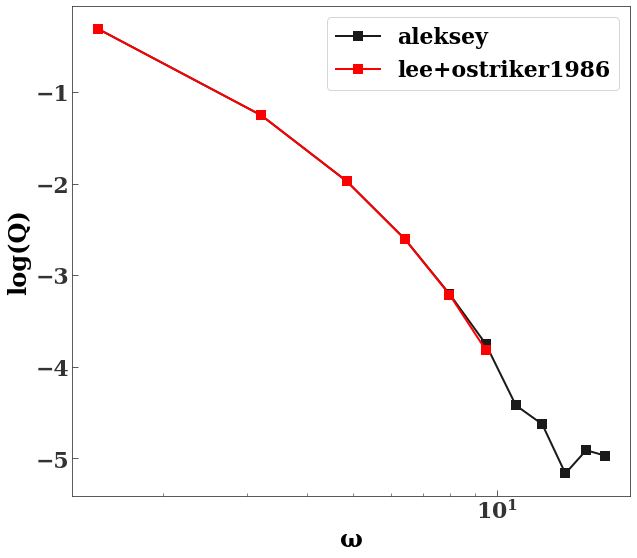

In [7]:
from astropy.table import Table

ns=range(0, 11)
ls=[2]
mode_summary_n32=np.empty([len(ns)*len(ls), 4])
fig,ax=plt.subplots(figsize=(10,9))
ax.set_xlabel(r'$\omega$')
ax.set_ylabel('log(Q)')
# ax.set_ylim(1.0e-8, 1.0)

Q1=ma_32.modes_dict['1_2']['Q']
omega_1=ma_32.modes_dict['1_2']['omega']

idx=0
for ll in ls:
    for nn in ns:
        mode=ma_32.modes_dict[str(nn)+'_'+str(ll)]
        mode_summary_n32[idx]=nn, ll, mode['omega'], mode['Q']
        idx+=1
 
compare=[0.4909, 0.05577, 0.01062, 0.002464, 6.154e-4, 1.543e-4]
mode_summary_n32=Table(mode_summary_n32)
#semilogy(mode_summary_n32['col0'],(mode_summary_n32['col2']/omega_1)**(17./6.)*Q1, '--')
#semilogy(mode_summary_n32['col0'],np.exp(-0.95*(mode_summary_n32['col2']-omega_2))*Q2, '--')
semilogx(mode_summary_n32['col2'],log10(np.abs(mode_summary_n32['col3'])), 's-', label='aleksey')
semilogx(mode_summary_n32['col2'][:6], log10(np.abs(compare)), 'rs-', label='lee+ostriker1986')
ax.legend()

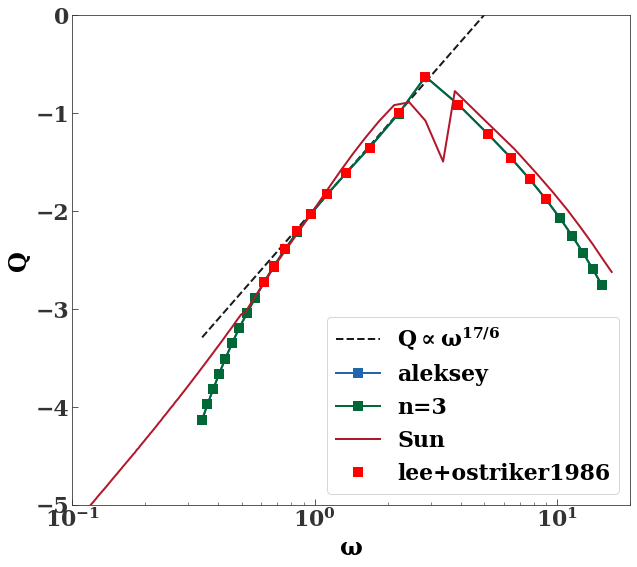

In [8]:
from astropy.table import Table

ns=range(-18, 11)
nsb=range(-105, 11)
ns=np.array(ns)
nsb=np.array(nsb)

ls=[2]
mode_summary_n3=np.empty([len(ns)*len(ls), 5])
mode_summary_n3b=np.empty([len(nsb)*len(ls), 5])

fig,ax=plt.subplots(figsize=(10,9))
ax.set_ylim(-5, 0.)
ax.set_xlim(0.1, 20)
ax.set_xlabel(r'$\omega$')
ax.set_ylabel('Q')

idx=0
Q1=ma_3.modes_dict['-4_2']['Q']
omega_1=ma_3.modes_dict['-4_2']['omega']

idx=0
tot=0.
for ll in ls:
    for nn in ns:
        mode=ma_3.modes_dict[str(nn)+'_'+str(ll)]
        mode_summary_n3[idx]=nn, ll, mode['omega'], mode['Q'], mode['xi_r'][-1]
        tot+=mode['Q']**2.
        idx+=1
idx=0   
totb=0.
for ll in ls:
    for nn in nsb:
        mode=ma_3b.modes_dict[str(nn)+'_'+str(ll)]
        mode_summary_n3b[idx]=nn, ll, mode['omega'], mode['Q'], mode['xi_r'][-1]
        totb+=mode['Q']**2.
        idx+=1
 
compare=[1.894e-3, 2.7e-3, 4.121e-3, 6.263e-3, 9.442e-3, 1.492e-2, 2.470e-2, 
         4.457e-2, 9.955e-2, 0.2372, 0.1226, 0.06163, 0.03498, 0.0211, 0.01322]
compare=np.array(compare)
mode_summary_n3=Table(mode_summary_n3)
mode_summary_n3b=Table(mode_summary_n3b)

omegas=mode_summary_n3['col2']
semilogx((mode_summary_n3['col2']),log10((mode_summary_n3['col2']/omega_1)**(17./6.)*Q1), '--',\
      label=r'$Q\propto \omega^{17/6}$')
semilogx((mode_summary_n3['col2']),log10(mode_summary_n3['col3']), 's-', label='aleksey')
# semilogx(omegas[omegas<2.], compare)
#loglog(mode_summary_n3['col0'],np.exp(-0.95*(mode_summary_n3['col2']-omega_2)))
#semilogy(mode_summary_n3['col0'][mode_summary_n3['col0']<0],(mode_summary_n3['col2'][mode_summary_n3['col0']<0]/omega_1)**(17./6.)*Q1, 'r--', label=r'$Q\propto \omega^{17/6}$')
#loglog(mode_summary_n3['col0'],np.exp(omega_2-mode_summary_n3['col2'])*Q2, 'r--', label=r'exp')
semilogx((mode_summary_n3['col2']),log10(mode_summary_n3['col3']), 's-', label='n=3')
semilogx((mode_summary_n3b['col2']),log10(mode_summary_n3b['col3']), '-', label='Sun')

semilogx(omegas[(ns>=-9) & (ns<=5)], log10(abs(compare)), 'rs', label='lee+ostriker1986')
ax.legend()



In [9]:
from scipy.interpolate import InterpolatedUnivariateSpline as IUS

v1=tot
v2=10.*mode_analyze.log_integral(ma_3.rs[0], ma_3.rs[-1], ma_3.rs, ma_3.rs**4*ma_3.rhos)

print (v2-v1)/v1*100.

0.0035967865638


In [10]:
from scipy.interpolate import InterpolatedUnivariateSpline as IUS

v1= totb
v2= 10.*mode_analyze.log_integral(ma_3b.rs[0], ma_3b.rs[-1], ma_3b.rs, ma_3b.rs**4*ma_3b.rhos)

print (v2-v1)/v1*100.

-0.249085249609


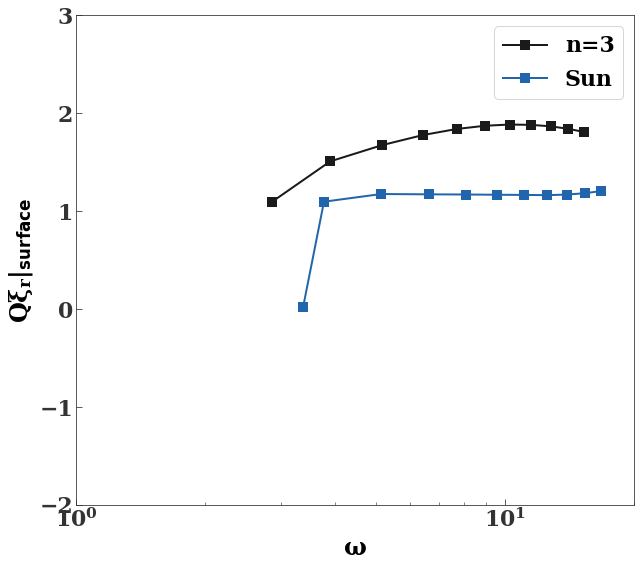

In [11]:
from astropy.table import Table

ns=range(0, 11)
nsb=range(0, 11)
ns=np.array(ns)
nsb=np.array(nsb)

ls=[2]
mode_summary_n3=np.empty([len(ns)*len(ls), 6])
mode_summary_n3b=np.empty([len(nsb)*len(ls), 6])

fig,ax=plt.subplots(figsize=(10,9))
ax.set_ylim(-2, 3.)
ax.set_xlim(1, 20)
ax.set_xlabel(r'$\omega$')
ax.set_ylabel(r'$Q \xi_r|_{\rm surface}$')

idx=0
Q1=ma_3.modes_dict['-4_2']['Q']
omega_1=ma_3.modes_dict['-4_2']['omega']

idx=0
for ll in ls:
    for nn in ns:
        mode=ma_3.modes_dict[str(nn)+'_'+str(ll)]
        mode_summary_n3[idx]=nn, ll, mode['omega'], mode['Q'], mode['xi_r'][-1],\
        mode_analyze.log_interp(0.999, mode['xs'], abs(mode['xi_r']))
        idx+=1
idx=0     
for ll in ls:
    for nn in nsb:
        mode=ma_3b.modes_dict[str(nn)+'_'+str(ll)]
        mode_summary_n3b[idx]=nn, ll, mode['omega'], mode['Q'], mode['xi_r'][-1],\
        mode_analyze.log_interp(0.999, mode['xs'], abs(mode['xi_r']))
        idx+=1
 
compare=[1.894e-3, 2.7e-3, 4.121e-3, 6.263e-3, 9.442e-3, 1.492e-2, 2.470e-2, 
         4.457e-2, 9.955e-2, 0.2372, 0.1226, 0.06163, 0.03498, 0.0211, 0.01322]
compare=np.array(compare)
mode_summary_n3=Table(mode_summary_n3)
mode_summary_n3b=Table(mode_summary_n3b)

semilogx((mode_summary_n3['col2']),log10(mode_summary_n3['col3']*mode_summary_n3['col4']), 's-', label='n=3')
semilogx((mode_summary_n3b['col2']),log10(mode_summary_n3b['col3']*mode_summary_n3b['col4']), 's-', label='Sun')


# semilogx(omegas[(ns>=-9) & (ns<=5)], log10(abs(compare)), 'rs', label='lee+ostriker1986')
ax.legend()


In [ ]:
%pylab inline
fig,ax=plt.subplots(figsize=(10,9))
ax.set_ylim(1.0e-5, 3.)

dat=np.genfromtxt('coupling_n3.csv',delimiter=',')
order=np.argsort(dat[:,0])
loglog(dat[:,0][order], dat[:,1][order])

loglog(ma_3b.etas, ma_3b.tidal_coupling(2))
# loglog(dat[:,0][order], dat[:,1][order], 'r--')
loglog(ma_3.etas, ma_3.tidal_coupling(2), 'r--')

In [ ]:
loglog(ma_3.modes_dict['0_2']['xs'], abs(ma_3.modes_dict['0_2']['xi_r']))

In [ ]:
%pylab inline
fig,ax=plt.subplots(figsize=(10,9))

dat=np.genfromtxt('coupling_n3.csv',delimiter=',')
order=np.argsort(dat[:,0])

loglog(ma_3.etas, Ts_3)
loglog(dat[:,0][order], dat[:,1][order], 'r--')

In [ ]:
from scipy.interpolate import interp1d

def phi(x):
    return 2.*np.arctan(x)

def t(x):
    return x+x**3./3.

xs=np.linspace(-1000, 1000, 100)
m=2.
l=2.
t1=t(xs)

tords=np.linspace(-1000, 1000, 500)
xords=interp1d(t1, xs)(tords)

out=np.fft.fft((1./(1+xords**2.))**(l+1.)*np.exp(phi(xords)*m*1.0j))